In [1]:
# prompt: connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# prompt: read /content/drive/MyDrive/AIML files/Life Expectancy Data.csv

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = "/content/drive/MyDrive/AIML files/Life Expectancy Data.csv"
try:
  df = pd.read_csv(file_path)
  print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01              

In [12]:
# prompt: isnull

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/AIML files/Life Expectancy Data.csv"
try:
  df = pd.read_csv(file_path)
  #print(df.head()) # Display the first few rows of the DataFrame

  # Check for null values in each column
  null_counts = df.isnull().sum()
  print("Null value counts per column:\n", null_counts)

  # Or, check for null values in the entire DataFrame
  total_nulls = df.isnull().sum().sum()
  print("\nTotal number of null values:", total_nulls)


except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Null value counts per column:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling            

In [7]:
# prompt: total no of rows?

print("Total number of rows:", len(df))

Total number of rows: 2938


In [9]:
# General information about the dataset
print("Dataset Info:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio 

In [11]:
# Function to print skewness and basic statistics for columns with missing values
def summarize_missing_columns(df):
    columns_with_missing = df.columns[df.isnull().sum() > 0]
    print("Summary of Columns with Missing Values:")
    for col in columns_with_missing:
        print(f"\nColumn: {col}")
        print(f"Skewness: {df[col].skew():.2f}")
        print(df[col].describe())

# Call the function to summarize columns with missing values
summarize_missing_columns(df)

# Imputation based on numerical insights
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:  # Low skewness, use mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # High skewness, use median
            df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values are handled
print("\nRemaining Missing Values:")
print(df.isnull().sum())

Summary of Columns with Missing Values:

Remaining Missing Values:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [17]:
# prompt: dtype

import numpy as np

# Assuming 'df' is your DataFrame from the previous code

# Display data types of each column
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [20]:
import pandas as pd
import scipy.stats as stats

# Strip column names to remove any leading or trailing spaces
df.columns = df.columns.str.strip()

# Check if 'Country' exists in the dataset
if 'Country' in df.columns and 'Life expectancy' in df.columns:
    # Group data by countries and exclude countries with insufficient data
    valid_countries = [
        country for country in df['Country'].unique()
        if len(df.loc[df['Country'] == country, 'Life expectancy'].dropna()) > 1
    ]

    # Group Life Expectancy by valid countries
    country_groups = [
        df.loc[df['Country'] == country, 'Life expectancy'].dropna()
        for country in valid_countries
    ]

    # Perform one-way ANOVA if there are enough groups
    if len(country_groups) > 1:
        f_stat, p_value = stats.f_oneway(*country_groups)
        print("ANOVA Test for All Countries:")
        print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.5f}")

        # Interpretation:
        if p_value < 0.05:
            print("There is a statistically significant difference in 'Life expectancy' across all countries.")
        else:
            print("No statistically significant difference in 'Life expectancy' across all countries.")
    else:
        print("Insufficient valid groups for ANOVA.")
else:
    print("The required columns 'Country' or 'Life expectancy' are missing from the dataset.")

ANOVA Test for All Countries:
F-statistic: 187.71, P-value: 0.00000
There is a statistically significant difference in 'Life expectancy' across all countries.


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
anova_results = {}

print("ANOVA Results:")
for col in categorical_columns:
    print(f"\nAnalyzing Column: {col}")
    groups = [df.loc[df[col] == category, 'Life expectancy'].dropna() for category in df[col].unique()]

    # Ensure there are at least two groups with valid data
    if len(groups) > 1 and all(len(group) > 0 for group in groups):
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {'F-statistic': f_stat, 'P-value': p_value}

        # Print detailed results
        print(f"F-statistic: {f_stat:.2f}")
        print(f"P-value: {p_value:.5f}")
        if p_value < 0.05:
            print("=> Statistically significant difference in 'Life expectancy' across categories.")
        else:
            print("=> No statistically significant difference in 'Life expectancy' across categories.")
    else:
        print("=> Insufficient data for ANOVA (e.g., empty or single-value groups).")

ANOVA Results:

Analyzing Column: Country
=> Insufficient data for ANOVA (e.g., empty or single-value groups).

Analyzing Column: Status
F-statistic: 886.16
P-value: 0.00000
=> Statistically significant difference in 'Life expectancy' across categories.

Analyzing Column: Region
=> Insufficient data for ANOVA (e.g., empty or single-value groups).


Correlation with 'Life expectancy':
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64


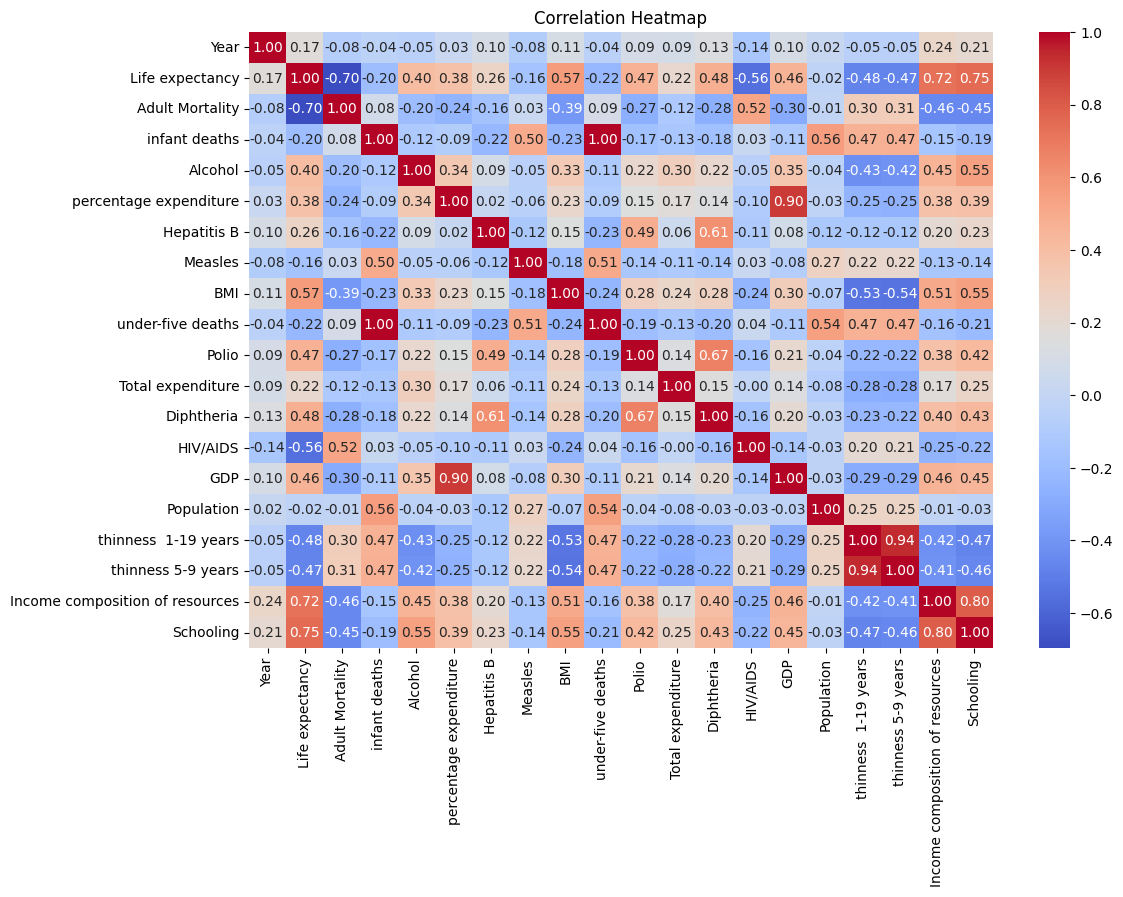

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Calculate correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# Extract correlation with 'Life expectancy'
if 'Life expectancy' in correlation_matrix.columns:
    correlation_with_life_expectancy = correlation_matrix['Life expectancy'].sort_values(ascending=False)
    print("Correlation with 'Life expectancy':")
    print(correlation_with_life_expectancy)
else:
    print("Column 'Life expectancy' not found in numerical correlation matrix.")

# Visualize the correlation matrix with a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-24-c5e474f6fa48>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)



Simple Linear Regression Equation:
Life Expectancy = 44.22 + 2.08 * Schooling

Simple Linear Regression Results:
Mean Squared Error (MSE): 39.37
R-squared (R2): 0.55


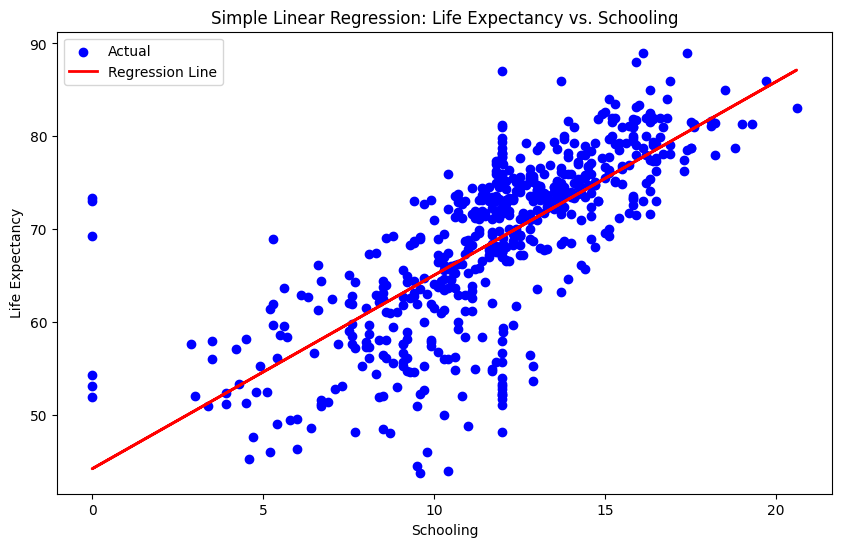

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Feature and target selection
X = df[['Schooling']]  # Independent variable
y = df['Life expectancy']  # Target variable

# Handle missing values (fill with mean, for example)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Print the model equation
print("\nSimple Linear Regression Equation:")
print(f"Life Expectancy = {intercept:.2f} + {coefficient:.2f} * Schooling")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("\nSimple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the regression line (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Simple Linear Regression: Life Expectancy vs. Schooling')
plt.legend()
plt.show()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Select features (include numerical and categorical variables)
numerical_features = [
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Adult Mortality',
    'HIV/AIDS',
    'GDP'
]

# Create dummy variables for categorical columns (Country and Status)
categorical_features = ['Country', 'Status']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Combine all features
X = df[numerical_features + [col for col in df.columns if 'Country_' in col or 'Status_' in col]]
y = df['Life expectancy']

# Handle missing values (fill with mean for simplicity)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the regression equation (partially for clarity)
print("\nMultiple Linear Regression Equation (First 10 Features):")
print(f"Life Expectancy = {intercept:.2f} ", end="")
for i, col in enumerate(X.columns[:10]):  # Displaying the first 10 features for brevity
    print(f"+ ({coefficients[i]:.2f} * {col})", end=" ")
print("\n... (equation truncated for brevity)")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nMultiple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Multiple Linear Regression Equation (First 10 Features):
Life Expectancy = 66.94 + (0.60 * Schooling) + (2.72 * Income composition of resources) + (0.00 * BMI) + (-0.00 * Adult Mortality) + (-0.44 * HIV/AIDS) + (0.00 * GDP) + (13.20 * Country_Albania) + (11.57 * Country_Algeria) + (-8.33 * Country_Angola) + (16.58 * Country_Antigua and Barbuda) 
... (equation truncated for brevity)

Multiple Linear Regression Results:
Mean Squared Error (MSE): 4.74
R-squared (R2): 0.95


<ipython-input-26-d16dd7872f52>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [27]:
# Print the full regression equation
print("\nFull Multiple Linear Regression Equation:")
equation = f"Life Expectancy = {intercept:.2f} "
for feature, coef in zip(X.columns, coefficients):
    equation += f"+ ({coef:.2f} * {feature}) "
print(equation)


Full Multiple Linear Regression Equation:
Life Expectancy = 66.94 + (0.60 * Schooling) + (2.72 * Income composition of resources) + (0.00 * BMI) + (-0.00 * Adult Mortality) + (-0.44 * HIV/AIDS) + (0.00 * GDP) + (13.20 * Country_Albania) + (11.57 * Country_Algeria) + (-8.33 * Country_Angola) + (16.58 * Country_Antigua and Barbuda) + (10.27 * Country_Argentina) + (11.77 * Country_Armenia) + (-0.36 * Country_Australia) + (2.61 * Country_Austria) + (9.22 * Country_Azerbaijan) + (12.23 * Country_Bahamas) + (12.05 * Country_Bahrain) + (10.04 * Country_Bangladesh) + (10.46 * Country_Barbados) + (6.65 * Country_Belarus) + (1.58 * Country_Belgium) + (7.39 * Country_Belize) + (-0.37 * Country_Benin) + (7.20 * Country_Bhutan) + (5.61 * Country_Bolivia (Plurinational State of)) + (14.69 * Country_Bosnia and Herzegovina) + (2.37 * Country_Botswana) + (10.39 * Country_Brazil) + (12.65 * Country_Brunei Darussalam) + (-4.33 * Country_Bulgaria) + (0.35 * Country_Burkina Faso) + (-0.40 * Country_Burund